In [38]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind
import seaborn as sns


In [3]:
df = pd.read_excel("yrbsqn.xlsx")

In [31]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,QN8,QN9,QN10,...,BMIPCT,RACEETH,Q6ORIG,Q7ORIG,QNDAYEVP,QNFREVP,QNDAYSKL,QNFRSKL,QNDAYCGR,QNFRCGR
0,5.0,2.0,3.0,2.0,E,1.90,108.86,2.0,2.0,2.0,...,97.44,5.0,603,240,2.0,2.0,2.0,2.0,2.0,2.0
1,7.0,2.0,3.0,1.0,NaN,1.60,58.97,2.0,2.0,2.0,...,60.88,6.0,503,130,2.0,2.0,2.0,2.0,2.0,2.0
2,5.0,1.0,3.0,1.0,A,1.65,64.41,2.0,2.0,2.0,...,78.50,7.0,505,142,2.0,2.0,2.0,2.0,2.0,2.0
3,6.0,1.0,3.0,1.0,NaN,1.60,64.86,2.0,2.0,2.0,...,84.61,6.0,503,143,2.0,2.0,2.0,2.0,2.0,2.0
4,7.0,2.0,3.0,2.0,E,1.75,65.77,2.0,2.0,2.0,...,40.08,5.0,509,145,2.0,2.0,2.0,2.0,2.0,2.0


In [33]:
df.shape

(14765, 150)

## Question 1
Is there a relationship between race and how much green salad one eats?

RACEETH: Race of subject
Q72: During the past 7 days, did you eat salad?
1 is no, 2 is yes



In [5]:
q1tb = pd.crosstab(df["QN72"], df["RACEETH"])
q1tb

RACEETH,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
QN72,,,,,,,,
1.0,53,248,1427,35,2296,641,810,337
2.0,78,373,1162,72,3831,795,1120,442


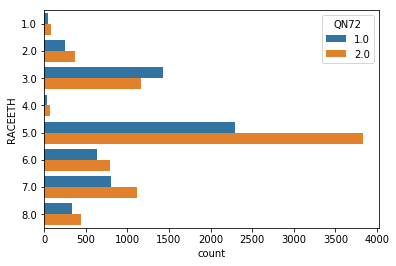

In [6]:
sns.countplot(data=df, hue="QN72", y="RACEETH")

In [7]:
chi2_contingency(q1tb)

(240.95541158311005,
 2.3276504187490516e-48,
 7,
 array([[  55.82776968,  264.64919825, 1103.34424198,   45.59978134,
         2611.1201895 ,  611.97463557,  822.50072886,  331.98345481],
        [  75.17223032,  356.35080175, 1485.65575802,   61.40021866,
         3515.8798105 ,  824.02536443, 1107.49927114,  447.01654519]]))

## Answer

**Null hypothesis**:  
$H_0$: Race and Salad consumed are indepedent of each other  
$H_A$: Race and Salad consumed are not independent of each other

**Assumptions**:
1. Data is in counted form
2. Randomization: The data comes from a SRS sample, and the population is greater than 10 * 14765. 
3. Expected Count: Each item in the expected table is greater than 5.

**Data output**:  
${\chi}^2$ = 240.955  
p-value: 2.328e-48 $\approx$ 0

**Conclusion**:
The p-value of 2.328e-48 $\approx$ 0 means that assuming race and salad consumed are independent, there is almost no chance of getting a sample that is as extreme or more than the sampled. Since this sample is so extreme, we have enough evidence to reject the null hypothesis and conclude that race and salad consumed are not indepedent of each other.


## Question 2
Compare the means of weight between Whites (5) and Hispanics (7).


In [47]:
wWeight = df.loc[df["RACEETH"] == 5]["Q7"].dropna()
print("Mean: {0} \t Std Dev: {1}".format(wWeight.mean(), wWeight.std()))

Mean: 67.17433533963792 	 Std Dev: 17.135629044969008


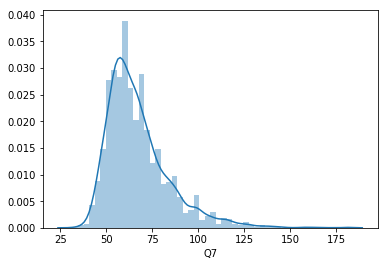

In [48]:
sns.distplot(wWeight)

In [49]:
hWeight= df.loc[df["RACEETH"] == 6]["Q7"].dropna()
print("Mean: {0} \t Std Dev: {1}".format(hWeight.mean(), hWeight.std()))

Mean: 67.61362612612598 	 Std Dev: 17.414649009945645


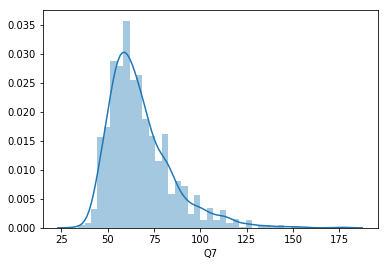

In [50]:
sns.distplot(hWeight)

In [40]:
ttest_ind(wBMI, hBMI)

Ttest_indResult(statistic=-10.19216578354955, pvalue=3.1463545997555385e-24)

## Answer

**Test**:  
Two-sample t-test: indepedent samples  
**Null hypothesis**:  
$H_0$: White and Hispanic's weight do not differ.  
$H_A$: White and Hispanic's weight do differ.

**Assumptions**: 
1. **Randomization**: The data comes from a SRS sample, and the population is greater than 10 * 14765.
2. **Independence**: The two samples are indepedent of each other (Whites do not affect Hispanics). The sample themselves are indepedent of each other (10 * 14765).
3. **Normality**: The two samples of size n = 14765 > 30, so CLT should be sufficient to guarentee the sampling distribution as normal. The sample, by the histogram, is skewed slightly towards the right.

**Data output**:  
$t$ = -10.192  
p-value: 3.146e-24 $\approx$ 0

**Conclusion**:
The p-value of 3.146e-24 $\approx$ 0 means that assuming White and Hispanic's weight do not differ, there is almost no chance of getting a sample that is as extreme or more than the sampled. Since this sample is so extreme, we have enough evidence to reject the null hypothesis and conclude that White and Hispanic's weight do differ.

## Question 3

Is there a relationship between White's height and their BMI.

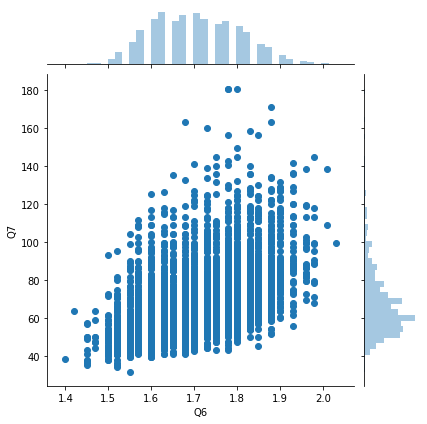

In [45]:
wHeight = df.loc[df["RACEETH"] == 5]["Q6"].dropna()

wWeight = df.loc[df["RACEETH"] == 5]["Q7"].dropna()
sns.jointplot(wHeight, wWeight)

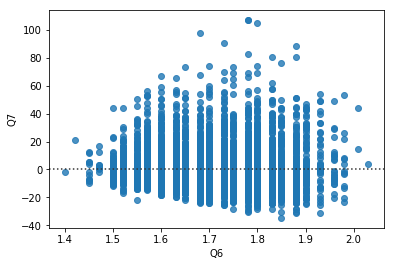

In [26]:
sns.residplot(wHeight, wWeight)

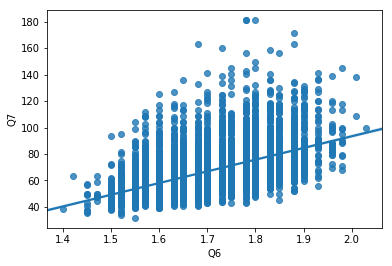

In [27]:
sns.regplot(wHeight, wWeight)

In [28]:
import numpy as np, statsmodels.api as sm

model_X = sm.add_constant(wHeight)
model_y = wWeight

mod = sm.OLS(model_y, model_X)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q7   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     2145.
Date:                Wed, 05 Jun 2019   Prob (F-statistic):               0.00
Time:                        07:41:47   Log-Likelihood:                -23859.
No. Observations:                5815   AIC:                         4.772e+04
Df Residuals:                    5813   BIC:                         4.774e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -83.2230      3.253    -25.581      0.000     -89.601     -76.845
Q6            88.2856      1.906     46.310      0.000      84.548      92.023
==============================================================================
Omnibus:                     2092.238   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9030.042
Skew:                           1.723   Prob(JB):                         0.00
Kurtosis:                       8.039   Cond. No.                         38.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
res.conf_int(.05)

,0,1
const,-89.600599,-76.845359
Q6,84.548338,92.022802


## Answer

**Test**:  
Regression Test  
**Null hypothesis**:  
$H_0$: There is no relationship between White's height and weight $\beta = 0$  
$H_A$: There is a relationship between White's height and weight $\beta \ne 0$

**Assumptions**: 
1. **Linearity**: The plot of the graph suggests that the relationship is linear.
2. **Randomization**: The data comes from a SRS sample, and the population is greater than 10 * 14765.
3. **Equal Variances**: The two samples have a residual graph with about the same variance throughout different heights, however, the variances seems to be higher at the center than at the ends.
4. **Normality**: The two samples of size n = 14765 > 30, so CLT should be sufficient to guarentee the sampling distribution as normal. Both samples, by the histograms, are slightly skewed to the right.

**Data output**:  
$\beta = 84.548$

p-value: 0.000

confidence interval (95%) of $\beta$: (84.548, 92.023)

**Conclusion**:
The p-value of 0.000 means that assuming that there is no relationship between White's height and weight, there is almost no chance of getting a sample that is as extreme or more than the sampled. Since this sample is so extreme, we have enough evidence to reject the null hypothesis and conclude that White's height and weight have a relationship.

The relationship from the sample is: 

$\hat{y} = -89.601 + 84.548x$  
with a confidence interval (95%) of $\beta$: (84.548, 92.023)

If we sample repeatedly from the same distribution with a sample size of n = 14765, then we expect 95% of those samples to generate a 95% confidence interval that contains the true population $b$. The interval generated from this sample, with 95% confidence, says that the slope would be between 84.548 and 92.023.
